In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
Img_size=224
Batch_size=32

In [3]:
tra_dat=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
tra_gen=tra_dat.flow_from_directory("/content/drive/MyDrive/Lung X-Ray Image/train",
                                    target_size=(Img_size,Img_size),
                                    batch_size=Batch_size,
                                    class_mode="categorical",
                                    subset="training"
                                    )
val_gen=tra_dat.flow_from_directory("/content/drive/MyDrive/Lung X-Ray Image/test",
                                    target_size=(Img_size,Img_size),
                                    batch_size=Batch_size,
                                    class_mode="categorical",
                                    subset="validation"
                                    )

Found 893 images belonging to 3 classes.
Found 162 images belonging to 3 classes.


In [5]:
class_ind=tra_gen.class_indices
print(class_ind)
class_names=list(class_ind.keys())
class_names

{'Lung_Opacity': 0, 'Normal': 1, 'Viral Pneumonia': 2}


['Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [9]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(Img_size,Img_size,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(68,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(len(class_names),activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 68)   │        19,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 68)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        78,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,175,111 (42.63 MB)

 Trainable params: 11,175,111 (42.63 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
model.fit(tra_gen,epochs=7,validation_data=val_gen,batch_size=Batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4205 - loss: 1.5381 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 396s 14s/step - accuracy: 0.4249 - loss: 1.5208 - val_accuracy: 0.7840 - val_loss: 0.5417
Epoch 2/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.7845 - loss: 0.5275 - val_accuracy: 0.8519 - val_loss: 0.4333
Epoch 3/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8258 - loss: 0.4350 - val_accuracy: 0.7963 - val_loss: 0.4046
Epoch 4/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.8412 - loss: 0.3886 - val_accuracy: 0.8395 - val_loss: 0.3858
Epoch 5/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8837 - loss: 0.3326 - val_accuracy: 0.8704 - val_loss: 0.3544
Epoch 6/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.8793 - loss: 0.3168 - val_accuracy: 0.8704 - val_loss: 0.3637
Epoch 7/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.8787 - loss: 0.2872 - val_accuracy: 0.8457 - val_loss: 0.3459


In [14]:
model.save("/content/drive/MyDrive/Lung X-Ray Image/model.h5")

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [18]:
model=load_model("/content/drive/MyDrive/Lung X-Ray Image/model.h5")

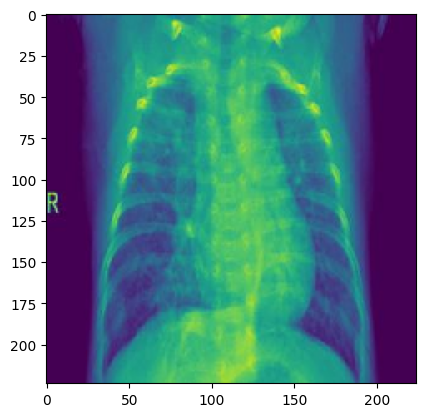

In [19]:
img=image.load_img("/content/drive/MyDrive/Lung X-Ray Image/test/Viral Pneumonia/127.jpg",
                   target_size=(Img_size,Img_size))
plt.imshow(img)
plt.axis()
plt.show()


In [20]:
img_arr=image.img_to_array(img)
img_arr=np.expand_dims(img_arr,axis=0)
img_arr/=255

In [21]:
pred=model.predict(img_arr)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


array([[2.6384066e-06, 1.2662727e-04, 9.9987078e-01]], dtype=float32)

In [23]:
op=np.argmax(pred)
class_names[op]

'Viral Pneumonia'